In [11]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

### Eigenfunctions, Eigenvalues ###
L = 5

# precompute a number of roots v, w, for efficiency
def even_transcendental(w):
    return L*w + np.tan(w)

def odd_transcendental(v):
    return 1 - L*v*np.tan(v)

def find_roots(func, num_roots):
    # 'adaptive' root finding
    dp = 0.01 # inital precision
    p0 = 0
    roots = [ round( optimize.fsolve(func, x0 = 0)[0], 5 ) ]
    
    num_without_change = 0
    curr_soln = roots[0]
    
    while curr_soln in roots and len(roots) < num_roots:
        p0 += dp * (num_without_change + 1)
        curr_soln = round( optimize.fsolve(func, x0 = p0)[0], 5 )
        
        if curr_soln not in roots:
            num_without_change = 0
            roots.append(curr_soln)
    
    return roots
            
ws = [ w for w in find_roots(even_transcendental, 7) if w > 0 ]
vs = [ v for v in find_roots(odd_transcendental, 7) if v > 0 ]
us = [ -1 ] # - 1 is a dummy value, to pad it so that we start at n = 1
for i in range(len(ws)):
    us.append(vs[i])
    us.append(ws[i])
    
def eigenvalues(n):
    return (2*L)/(1 + L**2 * us[n]**2)
    
def eigenfuncs(x, n):
    u = us[n]
    if n % 2 == 0:
        return np.sin(u * x) / np.sqrt( 1 - np.sin(2*u)/2*u )
    else:
        return np.cos(u * x) / np.sqrt( 1 + np.sin(2*u)/2*u )
    
def alpha_bar(x):
    return (1/8)*(x+1)**2

def karhunen_loeve(N, xs):
    s = 0
    for n in np.arange(1,N+1):
        lambda_n = eigenvalues(n)
        s += np.sqrt(lambda_n) * eigenfuncs(xs, n) * np.random.normal(0,1)
    s += alpha_bar(xs)
    return s

In [12]:
lambda_1 = eigenvalues(1)
lambda_2 = eigenvalues(2)
#print("$\lambda_1$ = ", eigenvalues(1))
#print("$\lambda_2$ = ", eigenvalues(2))

Text(0.5, 1.0, 'Eigenfunctions for $c(x,y) = e^{-|x-y| \\ / \\ 2L}$')

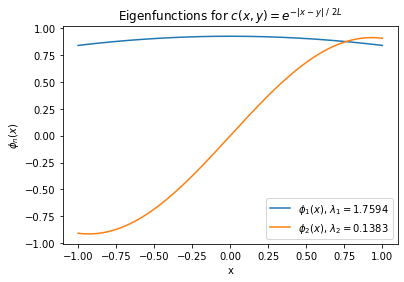

In [28]:
### Plot Eigenfunctions ###
fig, ax = plt.subplots(ncols=1)

xs = np.linspace(-1,1,1000)
phi_1 = eigenfuncs(xs,1)
phi_2 = eigenfuncs(xs,2)

ax.plot(xs, phi_1, label = "$\phi_1(x)$, $\lambda_1 = %.4f$" % lambda_1)
ax.plot(xs, phi_2, label = "$\phi_2(x)$, $\lambda_2 = %.4f$" % lambda_2)

ax.set_xlabel("x")
ax.set_ylabel("$\phi_n(x)$")

plt.legend()

ax.set_title("Eigenfunctions for $c(x,y) = e^{-|x-y| \ / \ 2L}$")

Text(0.5, 1.0, '1000 Realizations of Karhunen-Loeve $N = 3$ expansion')

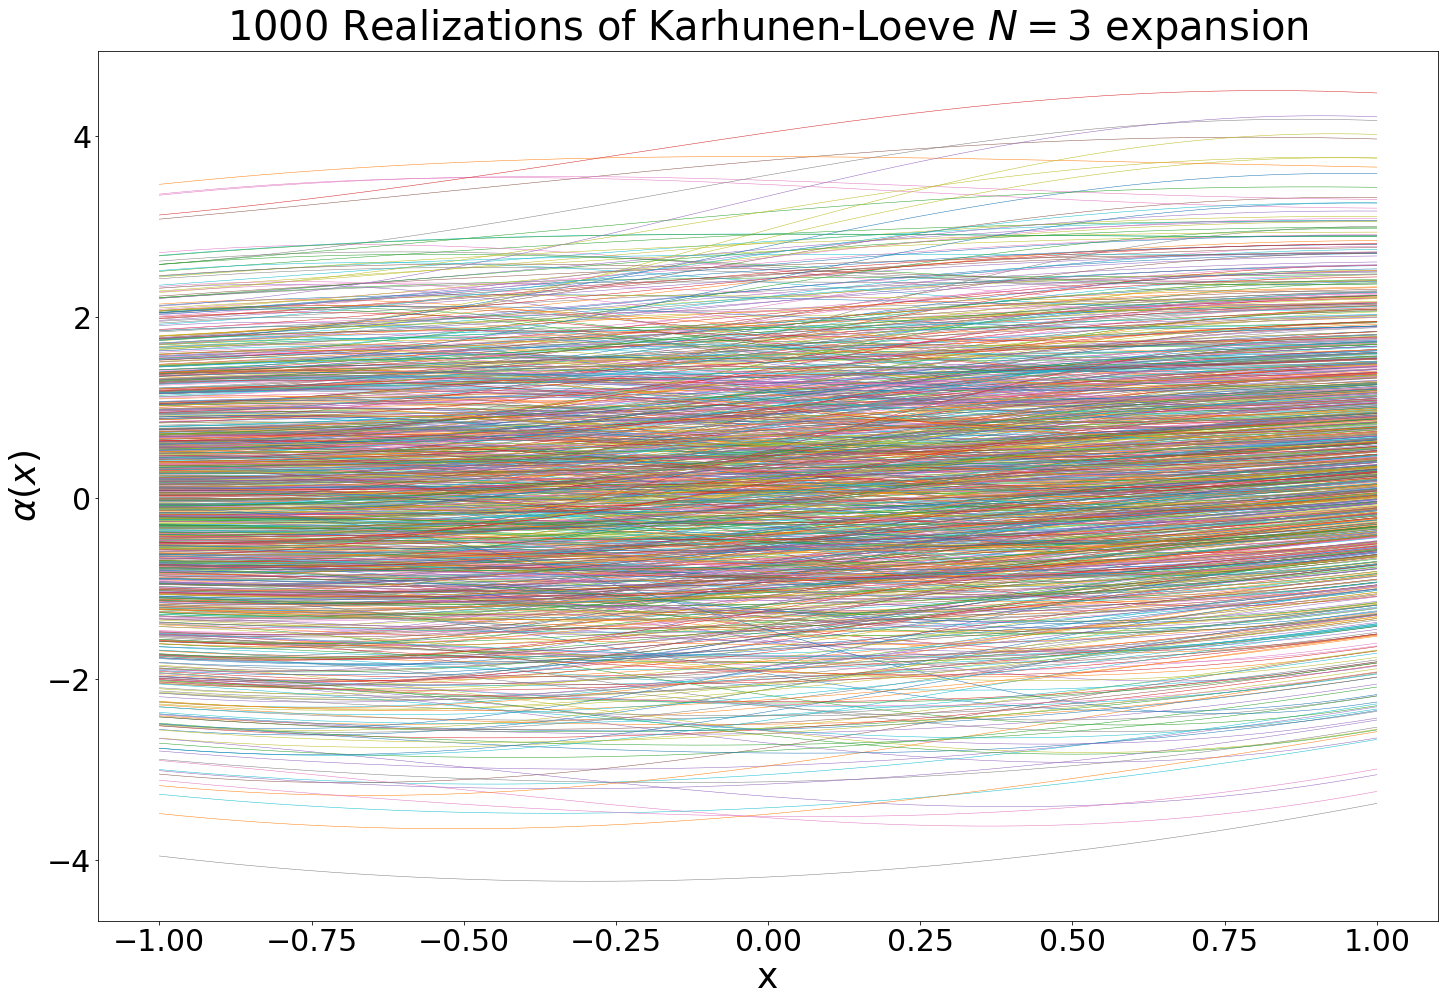

In [22]:
N_realizations = 1000
realizations = [ karhunen_loeve(2, xs) for n in range(N_realizations) ]

fig2, ax2 = plt.subplots(figsize=(24,16))
for r in realizations:
    ax2.plot(xs, r, linewidth = 0.5)
    
ax2.set_xlabel("x", fontsize=36)
ax2.set_ylabel(r"$\alpha(x)$", fontsize=36)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax2.set_title(r"1000 Realizations of Karhunen-Loeve $N = 3$ expansion", fontsize = 40)